<a href="https://colab.research.google.com/github/rckclimber/Monte_carlo_simulation_airline_overbooking/blob/master/Airline_Overbooking_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Monte Carlo Simulation for Airline Overbooking**

based on the blog post: https://simonensemble.github.io/operations%20research/2018/07/24/airline-overbooking/ 




In [0]:
#Setup
seat_capacity = 100;
prob_showup = 0.94;

In [0]:
import seaborn as sns
import matplotlib as mlt
import random as rd
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt


In [0]:
def show_up(prob_showup):
  if rd.random() <= 0.94 :
    return True; #person showed up
  else:
    return False; #person didnt show up
    

#print ("Defined function for probability of showing up");


In [0]:
#Simulating the flight, to fig out total customers who showed up for a flight
def simulate_flight(tickets_sold,prob_showup):
  n=0;
  for i in range(1,tickets_sold):
      if(show_up(prob_showup)):
        n = n+1;
        
  return n

In [0]:
#simulating the net Revenue per flight
def simulate_net_revenue(tickets_sold, seat_capacity,prob_showup, revenue_per_seat, voucher_cost):
  total_showups = simulate_flight(tickets_sold,prob_showup);
  # no one bumped from flight if less or equal folks show up than for the number of seats we have
  if (total_showups <= seat_capacity):
    return revenue_per_seat * total_showups;
  else:
     upset_customers = total_showups - seat_capacity;
     return (total_showups * revenue_per_seat) - (voucher_cost * upset_customers);
  


In [0]:
revenue_per_seat = 400;
voucher_cost = revenue_per_seat * 2;
no_simulations = 10000;
max_overbooking = 20;
revenue = np.zeros(shape = (no_simulations,max_overbooking+1));


In [0]:
#Running the simulation
for tickets_overbooked in range(0,max_overbooking):
  tickets_sold = seat_capacity + tickets_overbooked;
  for i in range(1,no_simulations):
    revenue[i,tickets_overbooked] = simulate_net_revenue(tickets_sold, seat_capacity,prob_showup, revenue_per_seat, voucher_cost);
    
   


In [0]:
print(revenue.shape);
print(revenue.dtype);

(10000, 21)
float64


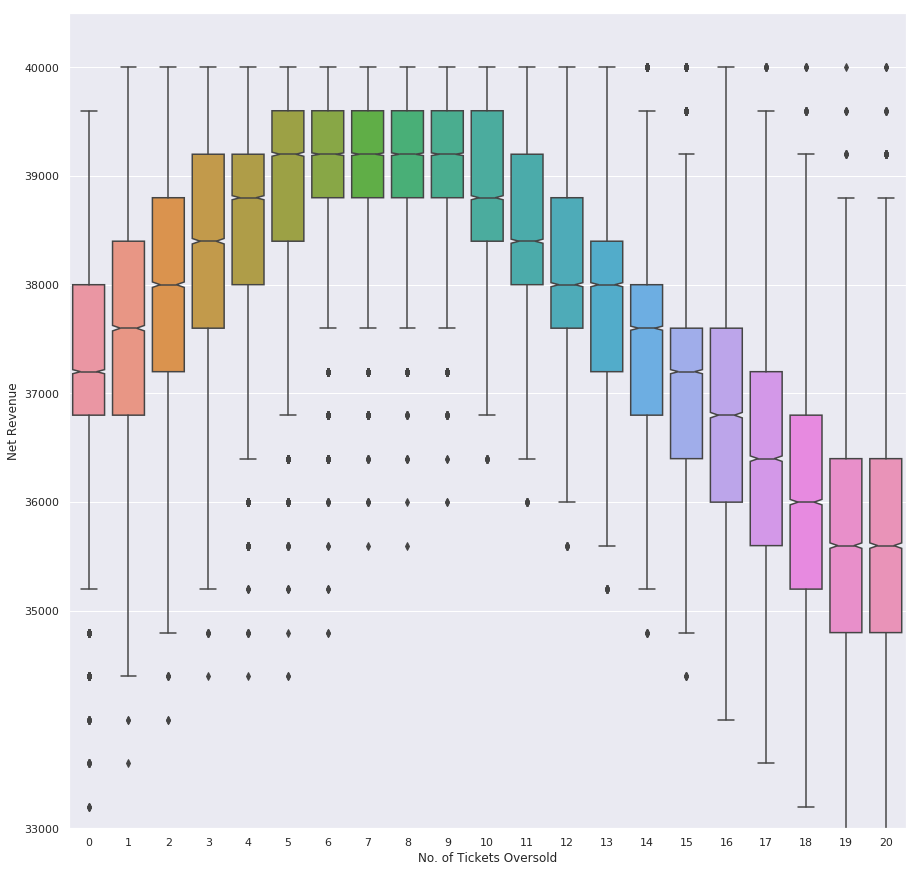

In [0]:
#Plotting the Simulation

sns.set();
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.boxplot(data = revenue, notch=True);
plt.xlabel("No. of Tickets Oversold");
plt.ylabel("Net Revenue")
plt.ylim(33000,40500);
plt.yticks([33000,35000,36000,37000,38000,39000,40000]);
